# 3. k-Means Clustering
In this lab, we will code the k-means clustering algorithm from scratch. We will perform k-means clustering on a toy dataset - iris.

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import os, sys
import matplotlib.pyplot as plt

np.random.seed(1)

iris =datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

class kmeans:
    def __init__(self, X, k=3, iters=1000):
        self.X       = X
        self.k       = k
        self.iters   = iters
        self.m       = X.shape[0]
        self.n       = X.shape[1]
        self.centers = np.random.randn(self.k, self.n)
        self.minIdx  = None
        self.costVal = 0.

    def fit(self):
            for _ in range(self.iters):
            # Step 1: Assign each data point to the nearest cluster
                dist2centers = distance.cdist(self.X, self.centers)  # Calculate distances to each center
                self.minIdx = np.argmin(dist2centers, axis=1)  # Find the index of the closest cluster
            
            # Step 2: Update the cluster centers using the mean of the data points
            for i in range(self.k):  # Loop over each cluster
                self.centers[i] = np.mean(self.X[self.minIdx == i], axis=0)  # Update center to mean of assigned points
            
            return self.minIdx


    def costFcn(self):
        for i in range(self.k):
            centers = self.centers[i].reshape((1, self.n))
            cluster_distance = distance.cdist(self.X[self.minIdx==i], centers)
            self.costVal += np.sum(np.square(cluster_distance))
        return self.costVal

In the following, we will test the k-means algorithm on the iris dataset. We will use the elbow method to find the optimal number of clusters. The elbow method is a heuristic used to determine the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The explained variation is the percentage of variance that is explained by the number of clusters. The following code will plot the explained variation as a function of the number of clusters.

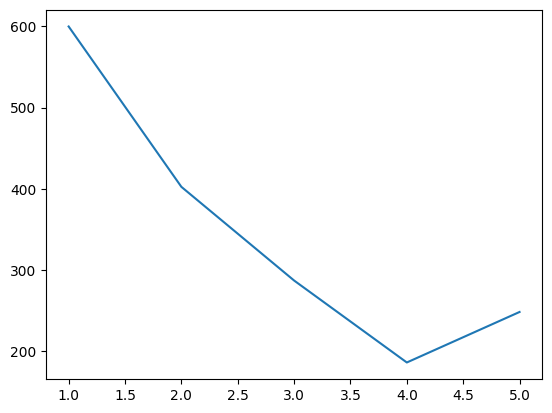

In [6]:
y_var = []
for i in range(1, 6):
    myKM = kmeans(X, k=i)
    myKM.fit()
    y_var.append(myKM.costFcn())
x_axis = [x for x in range(1, 6)]
plt.plot(x_axis, y_var)
plt.show()

After you finish the code, you should create a new folder at the `lab/` directory called `lab3` and save the file as `lab3.md`. 
In `lab3.md`, write down the number k that you think is the optimal number of clusters based on the elbow method. Also, write down the reason why you think that is the optimal number of clusters. Hint: we know the number of flower classes. 